# **Обучение LightGBM**

In [ ]:
data = pd.read_csv('data/result_fingerprint_maccs.csv')

,score,SMILES,MW_EXACT,XLogP,HBA,HBD,TPSA_NO,TPSA_NOPS,HAC,AtomCount,...,balaban_j,bertz_ct,kappa1,kappa2,kappa3,chi0v,chi1v,chi2v,chi3v,labute_asa
0,-243.59760,C[N+](C)(CCCCC(C#N)(c1ccccc1)c1ccccc1)CC[N+]1(...,421.309326,3.69,4,0,33.0,33.0,31.0,31.0,...,1.600784,796.290197,23.472635,10.414732,6.166765,19.594460,11.648657,9.991933,7.085336,188.402533
1,-135.10180,COc1ccc(CCN(C)C2CCN(C(C)(C)C)CC2)cc1,304.251465,3.88,3,0,15.7,15.7,22.0,22.0,...,1.767405,441.498142,17.296321,7.472131,4.719204,14.932068,8.481492,7.467725,4.948750,135.803032
2,-124.78700,Cc1ccc(-c2cccc(CN3CCCC(CO)(CN(C)C)C3)c2)o1,342.230713,3.14,4,1,40.1,40.1,25.0,25.0,...,1.713086,694.709426,18.179479,7.729477,4.513770,15.663738,9.133632,7.820780,5.085555,150.605260
3,-122.12820,C[N+]1(CC(=O)Nc2cccnn2)CCC[C@@H]1COC(=O)C(O)(c...,461.218872,1.68,8,2,101.4,101.4,34.0,35.0,...,1.461592,1071.919014,23.535243,10.109853,4.977250,19.132037,11.341087,8.855180,6.517779,198.347422
4,-119.81770,CN1CCN(Cc2cccc(C(=O)NCCN)c2)CC1,276.195007,-0.09,5,2,61.6,61.6,20.0,20.0,...,1.934333,441.254583,14.968345,7.378283,4.298420,12.139174,7.169199,5.324378,3.621143,120.280993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71483,-36.89519,CCCOC(=O)C1=C(C)NC(C)=C(C(=O)OCCC)C1c1ccccc1,357.194000,4.75,5,1,64.6,64.6,26.0,26.0,...,2.507533,676.786442,19.760636,9.224437,4.338203,15.925522,9.084769,6.317885,4.207656,154.620494
71484,-36.89509,COCC1c2c(cnn2CC2CCOCC2)CCN1Cc1ccoc1,345.205231,2.34,6,0,53.0,53.0,25.0,25.0,...,1.557715,661.517221,16.817848,7.723043,3.658509,14.894448,9.212500,7.116120,5.447110,148.244627
71485,-36.89509,N/C(=N\O)c1ccc(N2C(=O)COC[C@H]2c2ccccc2)cc1,311.126984,2.17,6,2,88.1,88.1,23.0,24.0,...,1.949299,713.623268,15.051788,6.495002,3.021366,12.423204,7.231696,5.237465,3.814946,133.325763
71486,-36.89431,CC1CCCCC1NC(=O)C1(C)Cn2c(cc3occc32)C(=O)N1c1cc...,423.195831,5.65,6,1,67.8,67.8,31.0,31.0,...,1.596808,1165.995779,19.848771,7.252260,3.141138,17.728823,10.861453,9.021799,6.888038,179.549542


In [ ]:
target_col = 'score'

X = data.drop(columns=[target_col])
y = data[target_col]

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

print("Средние значения после стандартизации (≈0):")
print(X_scaled.mean().round(3).head())

print("\nСтандартные отклонения после стандартизации (≈1):")
print(X_scaled.std().round(3).head())

Средние значения после стандартизации (≈0):
MW_EXACT   -0.0
XLogP       0.0
HBA        -0.0
HBD        -0.0
TPSA_NO     0.0
dtype: float64

Стандартные отклонения после стандартизации (≈1):
MW_EXACT    1.0
XLogP       1.0
HBA         1.0
HBD         1.0
TPSA_NO     1.0
dtype: float64


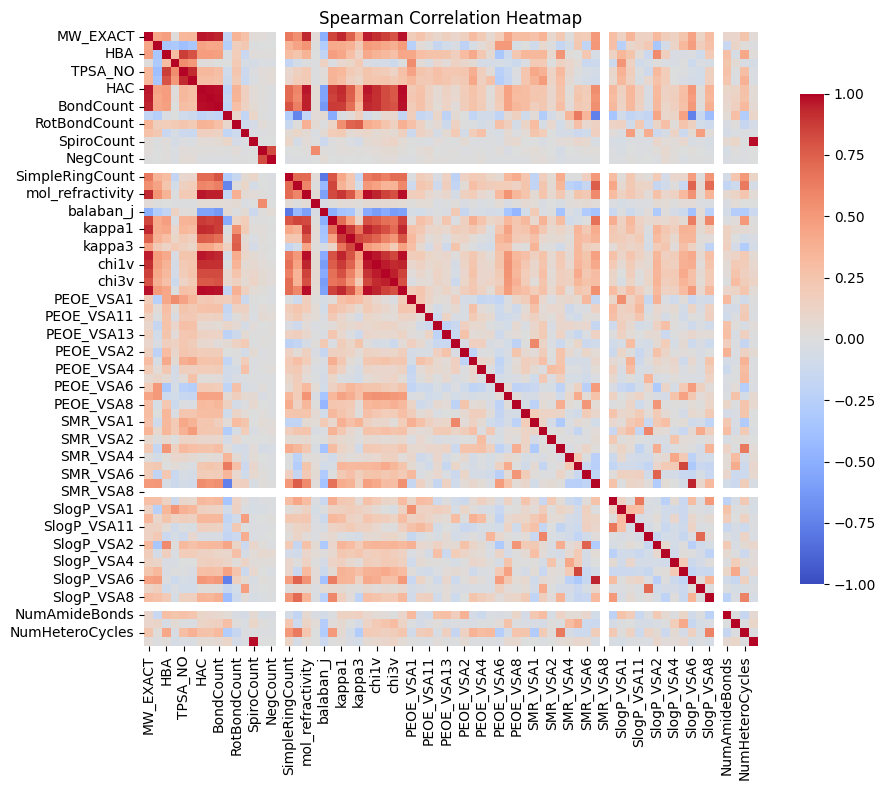

Оставшиеся признаки: ['MW_EXACT', 'XLogP', 'HBA', 'HBD', 'TPSA_NO', 'FSP3', 'RotBondCount', 'HalogenCount', 'SpiroCount', 'PosCount', 'NegCount', 'ComponentCount', 'SimpleRingCount', 'AromaticRingCount', 'formal_charge', 'balaban_j', 'bertz_ct', 'kappa2', 'kappa3', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'NumAmideBonds', 'NumAlifCarboxy', 'NumHeteroCycles']
Размер до: (71488, 70), после: (71488, 57)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_spearman = X_scaled.copy()

corr_spearman = X_spearman.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_spearman,
    annot=False,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title("Spearman Correlation Heatmap")
plt.tight_layout()
plt.show()

upper = corr_spearman.where(np.triu(np.ones(corr_spearman.shape), k=1).astype(bool))


to_drop = [col for col in upper.columns if any(upper[col].abs() > 0.9)]

X_filtered = X_spearman.drop(columns=to_drop)

print("Оставшиеся признаки:", X_filtered.columns.tolist())
print(f"Размер до: {X_spearman.shape}, после: {X_filtered.shape}")

y_filtered = y.loc[X_filtered.index]

In [ ]:
import optuna
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score

X = X_filtered
y = y_filtered

def objective(trial):
    params = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100, 300, 500, 1000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", -1, 12),   # -1 = без ограничения
        "num_leaves": trial.suggest_int("num_leaves", 20, 200),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),          # bagging_fraction
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),  # feature_fraction
        "reg_lambda": trial.suggest_float("reg_lambda", 0.01, 10.0, log=True),  # L2
        "reg_alpha": trial.suggest_float("reg_alpha", 0.01, 1.0, log=True),     # L1
        "random_state": 42,
        "n_jobs": -1
    }

    model = lgb.LGBMRegressor(**params)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        model,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=cv,
        n_jobs=-1
    )
    return -np.mean(scores)

=
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Лучшие гиперпараметры:")
print(study.best_params)
print(f"Лучшее значение MSE: {study.best_value:.4f}")


[I 2025-09-23 10:52:31,387] A new study created in memory with name: no-name-8a69aa59-06f3-438f-bf13-3e11cc47b519
[I 2025-09-23 10:59:49,121] Trial 0 finished with value: 22.250153473151386 and parameters: {'n_estimators': 100, 'learning_rate': 0.02354780273873553, 'max_depth': 11, 'num_leaves': 114, 'min_child_samples': 33, 'subsample': 0.9303753636577247, 'colsample_bytree': 0.6475644825928035, 'reg_lambda': 2.5204353566648563, 'reg_alpha': 0.01331606395368133}. Best is trial 0 with value: 22.250153473151386.
[I 2025-09-23 11:01:44,818] Trial 1 finished with value: 18.413518113165775 and parameters: {'n_estimators': 500, 'learning_rate': 0.04019713525044557, 'max_depth': 11, 'num_leaves': 149, 'min_child_samples': 31, 'subsample': 0.8609409640200236, 'colsample_bytree': 0.749107588568103, 'reg_lambda': 2.3477538559567424, 'reg_alpha': 0.24802499168587785}. Best is trial 1 with value: 18.413518113165775.
[I 2025-09-23 11:04:01,044] Trial 2 finished with value: 19.642392000939232 and p

Лучшие гиперпараметры:
{'n_estimators': 1000, 'learning_rate': 0.032781182208175635, 'max_depth': -1, 'num_leaves': 200, 'min_child_samples': 16, 'subsample': 0.9602827683254955, 'colsample_bytree': 0.6275585412579971, 'reg_lambda': 6.529777804445627, 'reg_alpha': 0.0120293030030161}
Лучшее значение MSE: 18.1304


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.118003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8874
[LightGBM] [Info] Number of data points in the train set: 57190, number of used features: 54
[LightGBM] [Info] Start training from score -47.399355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8877
[LightGBM] [Info] Number of data points in the train set: 57190, number of used features: 54
[LightGBM] [Info] Start training from score -47.434114
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8874
[LightGBM] [Info] Number of data points in the train set: 57190, number of used features: 54
[LightGBM] [Info] Start

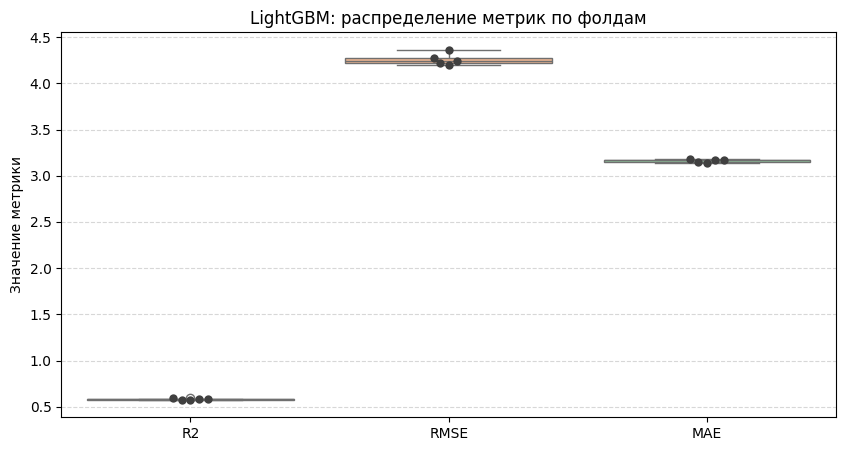

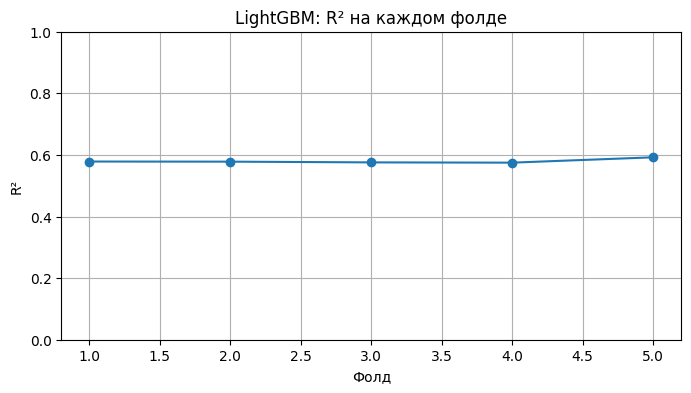

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
import lightgbm as lgb

best_params = study.best_params.copy()
best_params.update({"random_state": 42, "n_jobs": -1})

model = lgb.LGBMRegressor(**best_params)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(model, X, y, cv=cv, scoring="r2")

rmse_scores = -cross_val_score(model, X, y, cv=cv,
                               scoring="neg_root_mean_squared_error")

mae_scores = -cross_val_score(model, X, y, cv=cv,
                              scoring="neg_mean_absolute_error")

print("===== Результаты кросс-валидации =====")
print(f"Средний R² : {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"Средний RMSE: {rmse_scores.mean():.3f} ± {rmse_scores.std():.3f}")
print(f"Средний MAE : {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

# ===== Визуализация =====
metrics_df = pd.DataFrame({
    "R2":   r2_scores,
    "RMSE": rmse_scores,
    "MAE":  mae_scores
})

plt.figure(figsize=(10, 5))
sns.boxplot(data=metrics_df, palette="pastel")
sns.swarmplot(data=metrics_df, color=".25", size=6)
plt.title("LightGBM: распределение метрик по фолдам")
plt.ylabel("Значение метрики")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(1, cv.n_splits + 1), r2_scores, marker='o')
plt.title("LightGBM: R² на каждом фолде")
plt.xlabel("Фолд")
plt.ylabel("R²")
plt.ylim(0, 1)
plt.grid()
plt.show()
